# X8 - 10 Sheel Module
## No Front Blocker and RB = 2.6cm
### May, 2018
### Milo BC - Berkeley

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 0.0
rbr = 2.6
offaxisAngles = np.arange(0.0,2.,0.1) # Off-Axis Angles

NF_R262_All_Drays, NF_R262_All_Hrays, NF_R262_All_Prays = [], [], []
NF_R262_All_Hx, NF_R262_All_Hy, NF_R262_All_Px, NF_R262_All_Py, NF_R262_All_Dx, NF_R262_All_Dy = [], [], [], [], [], []


for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_'+'{:.1f}'.format(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]
    
    NF_R262_All_Drays.append(Drays)
    NF_R262_All_Hrays.append(Hrays)
    NF_R262_All_Prays.append(Prays)    

    sim_scale = 1.0    # 1cm = 17.4 arcmin    
    
    
    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    NF_R262_All_Hx.append(Hx)
    NF_R262_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    NF_R262_All_Px.append(Px)
    NF_R262_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    NF_R262_All_Dx.append(Dx)
    NF_R262_All_Dy.append(Dy)

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.1.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.3.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.4.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.5.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.6.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.7.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=

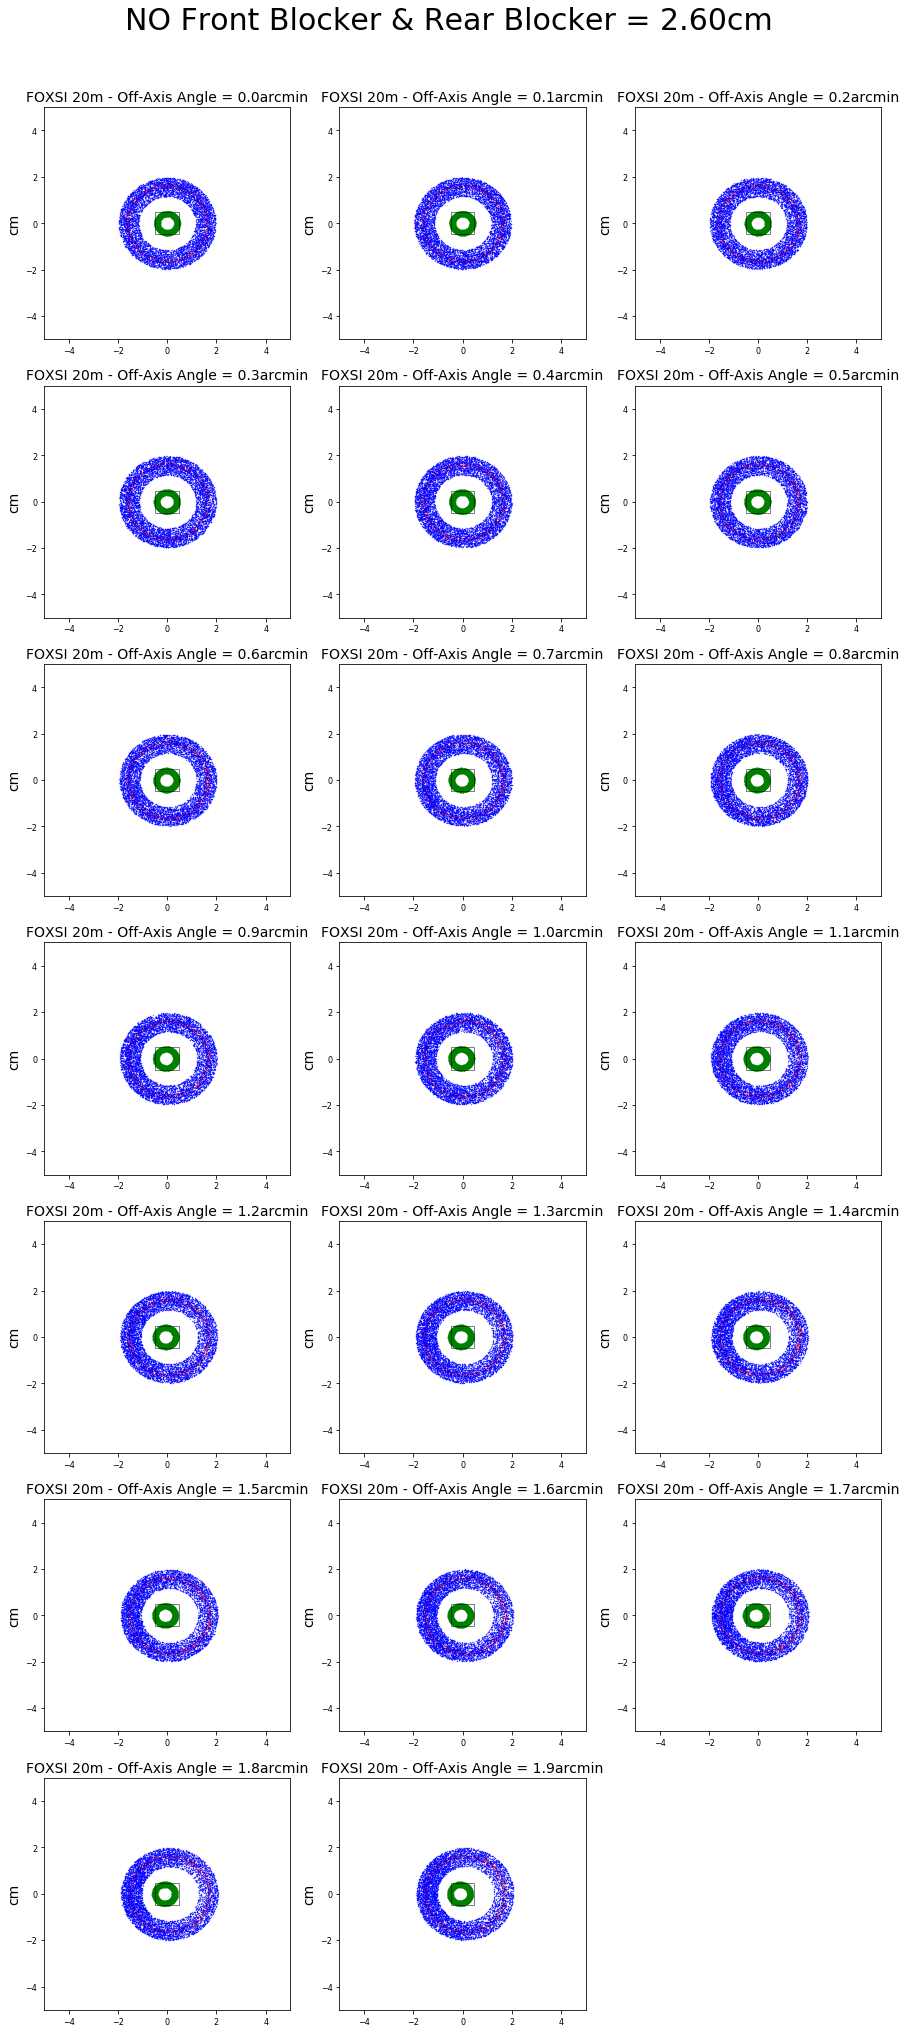

In [2]:
fig = plt.figure(figsize=(15,35))
st = fig.suptitle("NO Front Blocker & Rear Blocker = 2.60cm", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(7,3,i+1)
    plt.title('FOXSI 20m - Off-Axis Angle = '+'{:.1f}'.format(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(NF_R262_All_Hx[i],NF_R262_All_Hy[i],color='red',s=.1,alpha=0.8)
    plt.scatter(NF_R262_All_Px[i],NF_R262_All_Py[i],color='blue',s=.1,alpha=0.8)
    plt.scatter(NF_R262_All_Dx[i],NF_R262_All_Dy[i],color='green',s=.1,alpha=0.8)
    plt.ylim(-5.0,5.0)
    plt.xlim(-5.0,5.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

# Method for finding off-axis angle

## 0.0 arcmin

In [3]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.0.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.0.csv loaded.


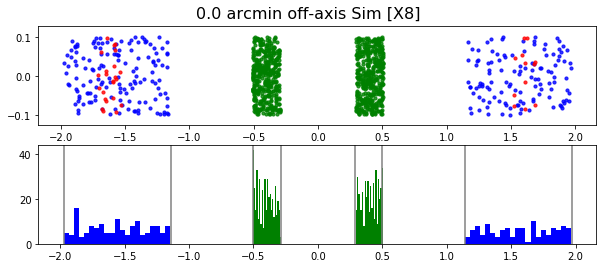

Mean =  -0.028064674436613944


In [4]:
A00V0 = -1.97
A00V1 = -1.14
A00V2 = -0.5
A00V3 = -0.29
A00V4 = 0.29
A00V5 = 0.5
A00V6 = 1.14
A00V7 = 1.97

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.0 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=10.,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=10.,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=10.,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A00V0,c='gray')
plt.axvline(A00V1,c='gray')
plt.axvline(A00V2,c='gray')
plt.axvline(A00V3,c='gray')
plt.axvline(A00V4,c='gray')
plt.axvline(A00V5,c='gray')
plt.axvline(A00V6,c='gray')
plt.axvline(A00V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.1 arcmin

In [5]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.1.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.1.csv loaded.


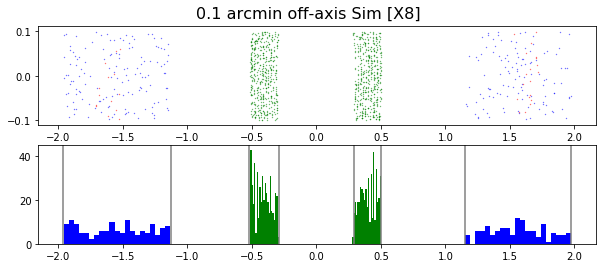

Mean =  -0.033583367149537205


In [6]:
A01V0 = -1.96
A01V1 = -1.13
A01V2 = -0.52
A01V3 = -0.29
A01V4 = 0.29
A01V5 = 0.5
A01V6 = 1.15
A01V7 = 1.97

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.1 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A01V0,c='gray')
plt.axvline(A01V1,c='gray')
plt.axvline(A01V2,c='gray')
plt.axvline(A01V3,c='gray')
plt.axvline(A01V4,c='gray')
plt.axvline(A01V5,c='gray')
plt.axvline(A01V6,c='gray')
plt.axvline(A01V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.2 arcmin

In [7]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.2.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.2.csv loaded.


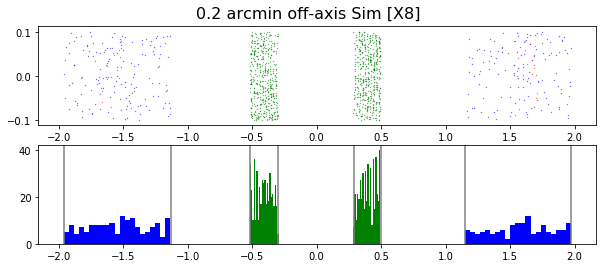

Mean =  -0.029580470716450202


In [8]:
A02V0 = -1.96
A02V1 = -1.13
A02V2 = -0.52
A02V3 = -0.30
A02V4 = 0.29
A02V5 = 0.5
A02V6 = 1.15
A02V7 = 1.97

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.2 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A02V0,c='gray')
plt.axvline(A02V1,c='gray')
plt.axvline(A02V2,c='gray')
plt.axvline(A02V3,c='gray')
plt.axvline(A02V4,c='gray')
plt.axvline(A02V5,c='gray')
plt.axvline(A02V6,c='gray')
plt.axvline(A02V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.3 arcmin

In [9]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.3.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.3.csv loaded.


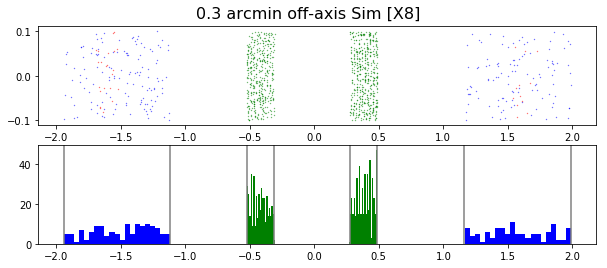

Mean =  -0.006095984128305118


In [10]:
A03V0 = -1.94
A03V1 = -1.12
A03V2 = -0.52
A03V3 = -0.31
A03V4 = 0.28
A03V5 = 0.49
A03V6 = 1.16
A03V7 = 1.99

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.3 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A03V0,c='gray')
plt.axvline(A03V1,c='gray')
plt.axvline(A03V2,c='gray')
plt.axvline(A03V3,c='gray')
plt.axvline(A03V4,c='gray')
plt.axvline(A03V5,c='gray')
plt.axvline(A03V6,c='gray')
plt.axvline(A03V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.4 arcmin

In [11]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.4.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.4.csv loaded.


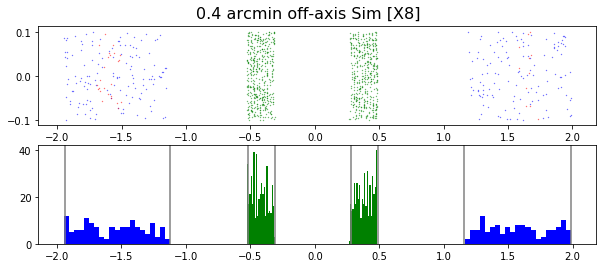

Mean =  -0.025469989508232538


In [12]:
A04V0 = -1.94
A04V1 = -1.12
A04V2 = -0.52
A04V3 = -0.31
A04V4 = 0.28
A04V5 = 0.49
A04V6 = 1.16
A04V7 = 1.99

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.4 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A04V0,c='gray')
plt.axvline(A04V1,c='gray')
plt.axvline(A04V2,c='gray')
plt.axvline(A04V3,c='gray')
plt.axvline(A04V4,c='gray')
plt.axvline(A04V5,c='gray')
plt.axvline(A04V6,c='gray')
plt.axvline(A04V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.5 arcmin

In [13]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.5.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.5.csv loaded.


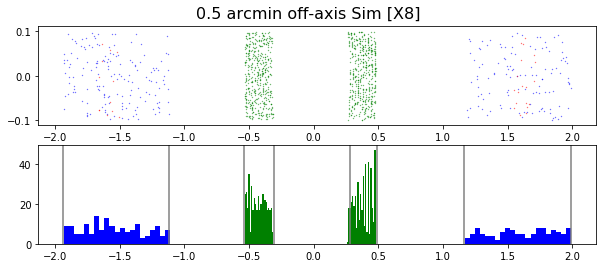

Mean =  -0.05893719258313135


In [14]:
A05V0 = -1.94
A05V1 = -1.12
A05V2 = -0.54
A05V3 = -0.31
A05V4 = 0.28
A05V5 = 0.49
A05V6 = 1.16
A05V7 = 1.99

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.5 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A05V0,c='gray')
plt.axvline(A05V1,c='gray')
plt.axvline(A05V2,c='gray')
plt.axvline(A05V3,c='gray')
plt.axvline(A05V4,c='gray')
plt.axvline(A05V5,c='gray')
plt.axvline(A05V6,c='gray')
plt.axvline(A05V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

# 0.6 arcmin

In [15]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.6.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.6.csv loaded.


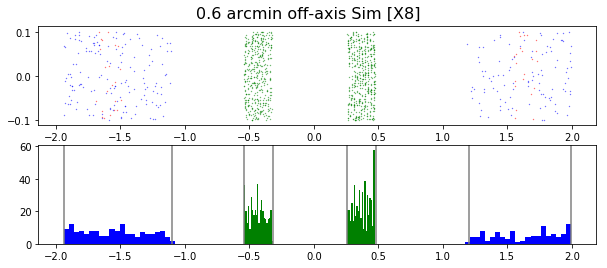

Mean =  -0.05293686575048612


In [16]:
A06V0 = -1.94
A06V1 = -1.1
A06V2 = -0.54
A06V3 = -0.32
A06V4 = 0.26
A06V5 = 0.48
A06V6 = 1.2
A06V7 = 1.99

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.6 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A06V0,c='gray')
plt.axvline(A06V1,c='gray')
plt.axvline(A06V2,c='gray')
plt.axvline(A06V3,c='gray')
plt.axvline(A06V4,c='gray')
plt.axvline(A06V5,c='gray')
plt.axvline(A06V6,c='gray')
plt.axvline(A06V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.7 arcmin 

In [17]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.7.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.7.csv loaded.


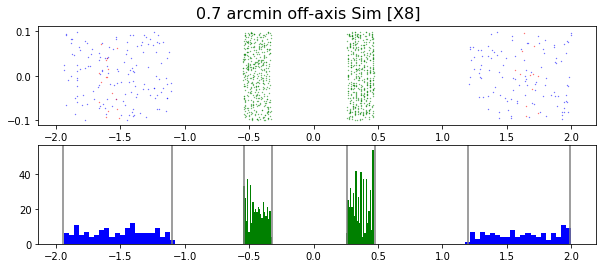

Mean =  -0.03929363530477185


In [18]:
A07V0 = -1.94
A07V1 = -1.1
A07V2 = -0.54
A07V3 = -0.32
A07V4 = 0.26
A07V5 = 0.48
A07V6 = 1.2
A07V7 = 1.99

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.7 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A07V0,c='gray')
plt.axvline(A07V1,c='gray')
plt.axvline(A07V2,c='gray')
plt.axvline(A07V3,c='gray')
plt.axvline(A07V4,c='gray')
plt.axvline(A07V5,c='gray')
plt.axvline(A07V6,c='gray')
plt.axvline(A07V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.8 arcmin

In [19]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.8.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.8.csv loaded.


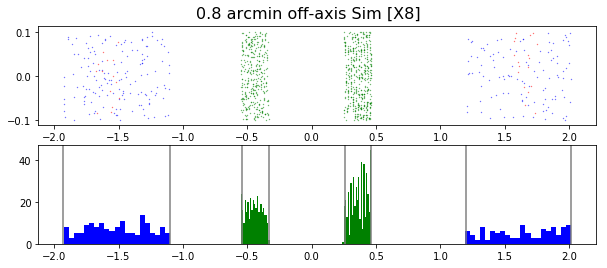

Mean =  -0.026618362822787074


In [20]:
A08V0 = -1.93
A08V1 = -1.1
A08V2 = -0.54
A08V3 = -0.33
A08V4 = 0.26
A08V5 = 0.46
A08V6 = 1.2
A08V7 = 2.01

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.8 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A08V0,c='gray')
plt.axvline(A08V1,c='gray')
plt.axvline(A08V2,c='gray')
plt.axvline(A08V3,c='gray')
plt.axvline(A08V4,c='gray')
plt.axvline(A08V5,c='gray')
plt.axvline(A08V6,c='gray')
plt.axvline(A08V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 0.9 arcmin

In [21]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.9.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_0.9.csv loaded.


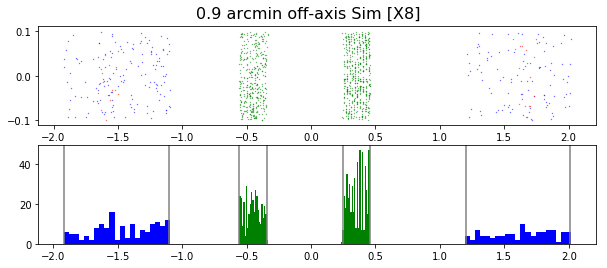

Mean =  -0.025362156858250266


In [22]:
A09V0 = -1.92
A09V1 = -1.1
A09V2 = -0.56
A09V3 = -0.34
A09V4 = 0.25
A09V5 = 0.46
A09V6 = 1.2
A09V7 = 2.01

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("0.9 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A09V0,c='gray')
plt.axvline(A09V1,c='gray')
plt.axvline(A09V2,c='gray')
plt.axvline(A09V3,c='gray')
plt.axvline(A09V4,c='gray')
plt.axvline(A09V5,c='gray')
plt.axvline(A09V6,c='gray')
plt.axvline(A09V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.0 arcmin

In [23]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.0.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.0.csv loaded.


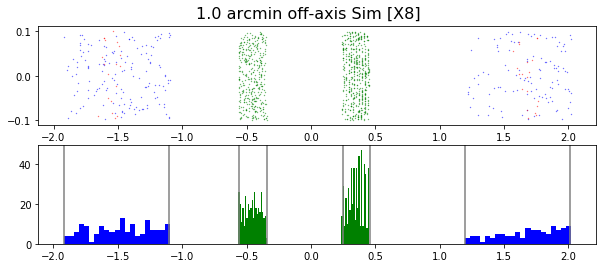

Mean =  -0.015125447284874426


In [24]:
A10V0 = -1.92
A10V1 = -1.1
A10V2 = -0.56
A10V3 = -0.34
A10V4 = 0.25
A10V5 = 0.46
A10V6 = 1.2
A10V7 = 2.01

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.0 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A10V0,c='gray')
plt.axvline(A10V1,c='gray')
plt.axvline(A10V2,c='gray')
plt.axvline(A10V3,c='gray')
plt.axvline(A10V4,c='gray')
plt.axvline(A10V5,c='gray')
plt.axvline(A10V6,c='gray')
plt.axvline(A10V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.1 arcmin

In [25]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.1.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.1.csv loaded.


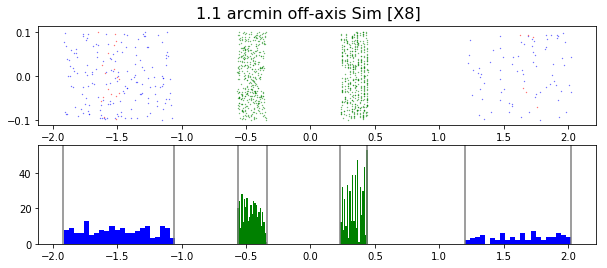

Mean =  -0.11469965069910096


In [26]:
A11V0 = -1.92
A11V1 = -1.06
A11V2 = -0.56
A11V3 = -0.34
A11V4 = 0.23
A11V5 = 0.44
A11V6 = 1.2
A11V7 = 2.02

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.1 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A11V0,c='gray')
plt.axvline(A11V1,c='gray')
plt.axvline(A11V2,c='gray')
plt.axvline(A11V3,c='gray')
plt.axvline(A11V4,c='gray')
plt.axvline(A11V5,c='gray')
plt.axvline(A11V6,c='gray')
plt.axvline(A11V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.2 arcmin

In [27]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.2.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.2.csv loaded.


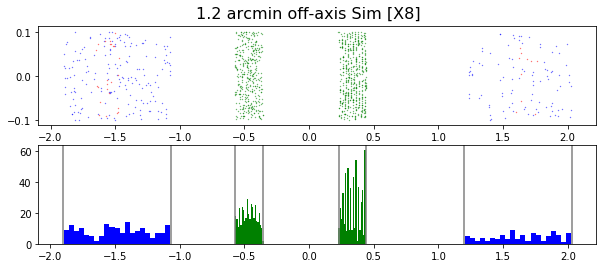

Mean =  -0.08544116888019285


In [28]:
A12V0 = -1.90
A12V1 = -1.07
A12V2 = -0.57
A12V3 = -0.36
A12V4 = 0.23
A12V5 = 0.44
A12V6 = 1.2
A12V7 = 2.03

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.2 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A12V0,c='gray')
plt.axvline(A12V1,c='gray')
plt.axvline(A12V2,c='gray')
plt.axvline(A12V3,c='gray')
plt.axvline(A12V4,c='gray')
plt.axvline(A12V5,c='gray')
plt.axvline(A12V6,c='gray')
plt.axvline(A12V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.3 arcmin

In [29]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.3.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.3.csv loaded.


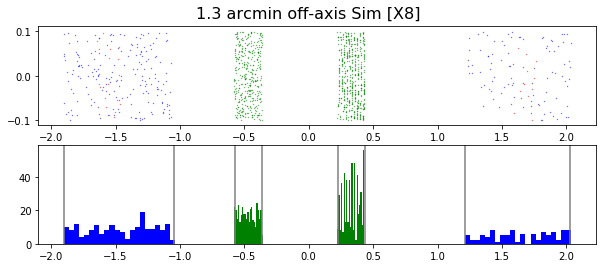

Mean =  -0.09820164632462382


In [30]:
A13V0 = -1.90
A13V1 = -1.05
A13V2 = -0.57
A13V3 = -0.36
A13V4 = 0.23
A13V5 = 0.44
A13V6 = 1.21
A13V7 = 2.03

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.3 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A13V0,c='gray')
plt.axvline(A13V1,c='gray')
plt.axvline(A13V2,c='gray')
plt.axvline(A13V3,c='gray')
plt.axvline(A13V4,c='gray')
plt.axvline(A13V5,c='gray')
plt.axvline(A13V6,c='gray')
plt.axvline(A13V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

# 1.4 arcmin

In [31]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.4.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.4.csv loaded.


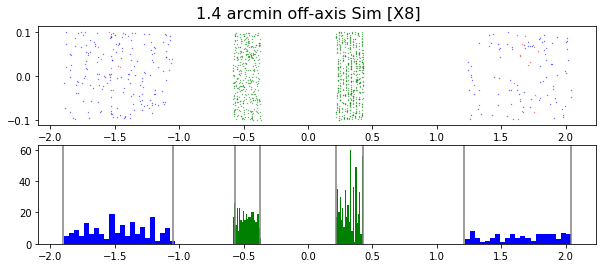

Mean =  -0.09462853596037815


In [32]:
A14V0 = -1.90
A14V1 = -1.05
A14V2 = -0.57
A14V3 = -0.37
A14V4 = 0.22
A14V5 = 0.43
A14V6 = 1.21
A14V7 = 2.04

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.4 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A14V0,c='gray')
plt.axvline(A14V1,c='gray')
plt.axvline(A14V2,c='gray')
plt.axvline(A14V3,c='gray')
plt.axvline(A14V4,c='gray')
plt.axvline(A14V5,c='gray')
plt.axvline(A14V6,c='gray')
plt.axvline(A14V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.5 arcmin

In [33]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.5.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.5.csv loaded.


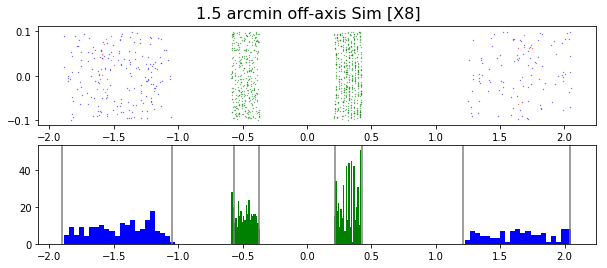

Mean =  -0.08562746178368724


In [34]:
A15V0 = -1.90
A15V1 = -1.05
A15V2 = -0.57
A15V3 = -0.37
A15V4 = 0.22
A15V5 = 0.43
A15V6 = 1.21
A15V7 = 2.04

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.5 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A15V0,c='gray')
plt.axvline(A15V1,c='gray')
plt.axvline(A15V2,c='gray')
plt.axvline(A15V3,c='gray')
plt.axvline(A15V4,c='gray')
plt.axvline(A15V5,c='gray')
plt.axvline(A15V6,c='gray')
plt.axvline(A15V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.6 arcmin

In [35]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.6.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.6.csv loaded.


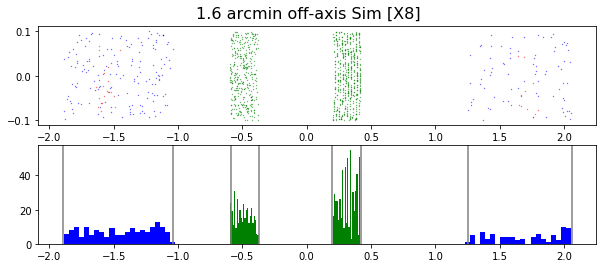

Mean =  -0.08746561089950701


In [36]:
A16V0 = -1.89
A16V1 = -1.04
A16V2 = -0.59
A16V3 = -0.37
A16V4 = 0.20
A16V5 = 0.42
A16V6 = 1.25
A16V7 = 2.06

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.6 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A16V0,c='gray')
plt.axvline(A16V1,c='gray')
plt.axvline(A16V2,c='gray')
plt.axvline(A16V3,c='gray')
plt.axvline(A16V4,c='gray')
plt.axvline(A16V5,c='gray')
plt.axvline(A16V6,c='gray')
plt.axvline(A16V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.7 arcmin

In [37]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.7.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.7.csv loaded.


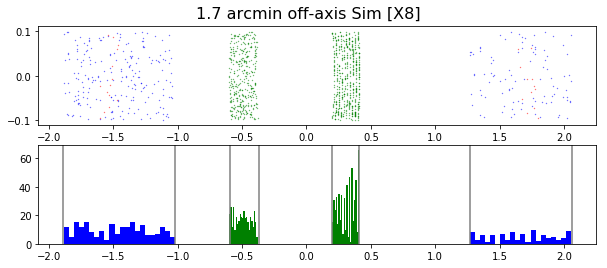

Mean =  -0.12737490074707858


In [38]:
A17V0 = -1.89
A17V1 = -1.02
A17V2 = -0.59
A17V3 = -0.37
A17V4 = 0.20
A17V5 = 0.41
A17V6 = 1.27
A17V7 = 2.06

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.7 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A17V0,c='gray')
plt.axvline(A17V1,c='gray')
plt.axvline(A17V2,c='gray')
plt.axvline(A17V3,c='gray')
plt.axvline(A17V4,c='gray')
plt.axvline(A17V5,c='gray')
plt.axvline(A17V6,c='gray')
plt.axvline(A17V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.8 arcmin

In [39]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.8.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.8.csv loaded.


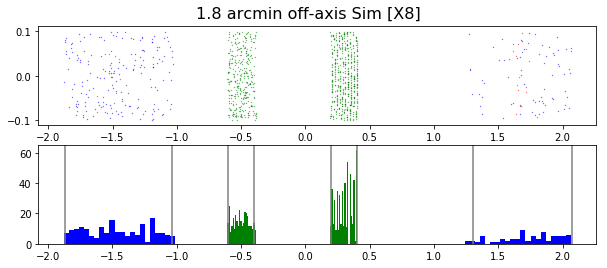

Mean =  -0.12520391534109382


In [40]:
A18V0 = -1.87
A18V1 = -1.04
A18V2 = -0.6
A18V3 = -0.4
A18V4 = 0.2
A18V5 = 0.4
A18V6 = 1.3
A18V7 = 2.07

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.8 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A18V0,c='gray')
plt.axvline(A18V1,c='gray')
plt.axvline(A18V2,c='gray')
plt.axvline(A18V3,c='gray')
plt.axvline(A18V4,c='gray')
plt.axvline(A18V5,c='gray')
plt.axvline(A18V6,c='gray')
plt.axvline(A18V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

## 1.9 arcmin

In [41]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.9.csv')
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)

# Selecting rays on focal plane
yth=0.1
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 and ray.des[1]>=-yth and ray.des[1]<=yth)]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' ) and ray.des[1]>=-yth and ray.des[1]<=yth]

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
   

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/Laser_Alignment/X8/rays/rays_Angle_=_1.9.csv loaded.


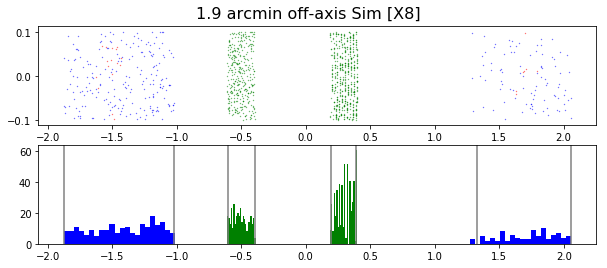

Mean =  -0.12945649436007092


In [42]:
A19V0 = -1.87
A19V1 = -1.02
A19V2 = -0.6
A19V3 = -0.39
A19V4 = 0.2
A19V5 = 0.39
A19V6 = 1.33
A19V7 = 2.06

fig = plt.figure(figsize=(10,4))
st = fig.suptitle("1.9 arcmin off-axis Sim [X8]", fontsize=16,y=0.95)
plt.subplot(2,1,1)
plt.scatter(Dx,Dy,color='green',s=.1,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=.1,alpha=0.8)
plt.scatter(Hx,Hy,color='red',s=.1,alpha=0.8)
# Histogram 
plt.subplot(2,1,2)
plt.hist(Dx,bins=100,color='g')
plt.hist(Px,bins=100,color='b')
plt.axvline(A19V0,c='gray')
plt.axvline(A19V1,c='gray')
plt.axvline(A19V2,c='gray')
plt.axvline(A19V3,c='gray')
plt.axvline(A19V4,c='gray')
plt.axvline(A19V5,c='gray')
plt.axvline(A19V6,c='gray')
plt.axvline(A19V7,c='gray')
plt.show()
print('Mean = ',np.mean(Dx + Px))

In [43]:
V0 = np.array([A00V0,A01V0,A02V0,A03V0,A04V0,A05V0,A06V0,A07V0,A08V0,A09V0,A10V0,
     A11V0,A12V0,A13V0,A14V0,A15V0,A16V0,A17V0,A18V0,A19V0])
V1 = np.array([A00V1,A01V1,A02V1,A03V1,A04V1,A05V1,A06V1,A07V1,A08V1,A09V1,A10V1,
     A11V1,A12V1,A13V1,A14V1,A15V1,A16V1,A17V1,A18V1,A19V1])
V2 = np.array([A00V2,A01V2,A02V2,A03V2,A04V2,A05V2,A06V2,A07V2,A08V2,A09V2,A10V2,
     A11V2,A12V2,A13V2,A14V2,A15V2,A16V2,A17V2,A18V2,A19V2])
V3 = np.array([A00V3,A01V3,A02V3,A03V3,A04V3,A05V3,A06V3,A07V3,A08V3,A09V3,A10V3,
     A11V3,A12V3,A13V3,A14V3,A15V3,A16V3,A17V3,A18V3,A19V3])
V4 = np.array([A00V4,A01V4,A02V4,A03V4,A04V4,A05V4,A06V4,A07V4,A08V4,A09V4,A10V4,
     A11V4,A12V4,A13V4,A14V4,A15V4,A16V4,A17V4,A18V4,A19V4])
V5 = np.array([A00V5,A01V5,A02V5,A03V5,A04V5,A05V5,A06V5,A07V5,A08V5,A09V5,A10V5,
     A11V5,A12V5,A13V5,A14V5,A15V5,A16V5,A17V5,A18V5,A19V5])
V6 = np.array([A00V6,A01V6,A02V6,A03V6,A04V6,A05V6,A06V6,A07V6,A08V6,A09V6,A10V6,
     A11V6,A12V6,A13V6,A14V6,A15V6,A16V6,A17V6,A18V6,A19V6])
V7 = np.array([A00V7,A01V7,A02V7,A03V7,A04V7,A05V7,A06V7,A07V7,A08V7,A09V7,A10V7,
     A11V7,A12V7,A13V7,A14V7,A15V7,A16V7,A17V7,A18V7,A19V7])

In [44]:
param = ((V7+V6)-(V5+V4))/((V3+V2)-(V1+V0))
param1 = (V6-V5)/(V2-V1)
param2 = (V7-V5)/(V2-V0)

In [83]:
X8param = 1.134
# Linear regression
p = np.poly1d(np.polyfit(param, offaxisAngles, 1))
p(X8param)

0.6743476957336099

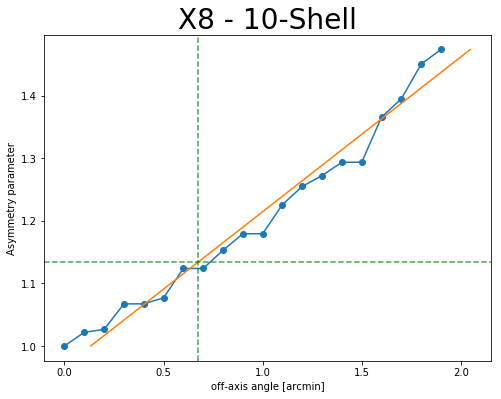

In [82]:
plt.figure(figsize=(8,6))
plt.plot(offaxisAngles,param,'o-')
plt.plot(p(param),param)
plt.xlabel('off-axis angle [arcmin]')
plt.ylabel('Asymmetry parameter')
plt.title('X8 - 10-Shell',fontsize='28')
plt.axhline(X8param,color='g',linestyle='dashed',alpha=0.7)
plt.axvline(p(X8param),color='g',linestyle='dashed',alpha=0.7)

## X7

In [87]:
X7param = 1.088
# Linear regression
p = np.poly1d(np.polyfit(param, offaxisAngles, 1))
p(X7param)

0.48832756499239904

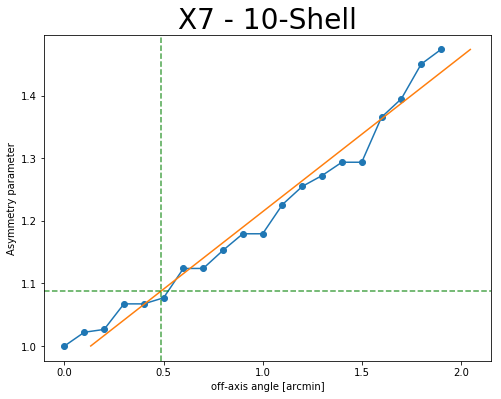

In [88]:
plt.figure(figsize=(8,6))
plt.plot(offaxisAngles,param,'o-')
plt.plot(p(param),param)
plt.xlabel('off-axis angle [arcmin]')
plt.ylabel('Asymmetry parameter')
plt.title('X7 - 10-Shell',fontsize='28')
plt.axhline(X7param,color='g',linestyle='dashed',alpha=0.7)
plt.axvline(p(X7param),color='g',linestyle='dashed',alpha=0.7)